<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/MNIST/DigitRecognizer_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 35kB/s 
     |████████████████████████████████| 1.2MB 25.6MB/s 
     |████████████████████████████████| 4.0MB 12.5MB/s 
     |████████████████████████████████| 471kB 58.6MB/s 
     |████████████████████████████████| 6.0MB 60.4MB/s 
     |████████████████████████████████| 4.0MB 35.2MB/s 
     |████████████████████████████████| 4.9MB 27.1MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.5.0 which is incompatible.
  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Found existing installation: ten

In [2]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from keras import datasets               #import datasets provided by Keras API 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
from sklearn.model_selection import train_test_split

np.random.seed=1000
tf.random.set_seed=42

X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test, train_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(5000, 28, 28)
(5000,)
(5000, 28, 28)
(5000,)


In [6]:
def plot_sample(X,y,index):
  plt.figure(figsize = (2,2))
  plt.imshow(X[index],cmap=plt.cm.binary)
  plt.xlabel(y[index])
  plt.show()

In [7]:
y_test[1]

2

In [8]:
y_train[1]

0

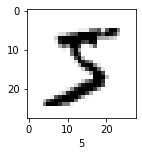

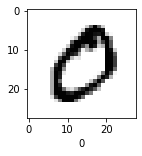

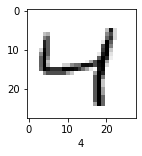

In [9]:
for index in range(0,3):
  plot_sample(X_train,y_train,index)

In [10]:
from keras import models         #importing models package from Keras
from keras import Sequential     #importing Sequential package from Keras to create a Sequential model
from keras import layers         #importing layers package from Keras which will be used for adding Input Layers, Hidden Layers & Output Layers
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping  #importing EarlyStopping package from Keras Callbacks
from keras.callbacks import ModelCheckpoint   #importing ModelCheckPoint library from keras.callback

### ANN with 3 Hidden Layers using EarlyStopping and CheckPoint callbacks

In [11]:
model_es = Sequential()

model_es.add(layers.Flatten(input_shape=(28,28)))
model_es.add(Dense(100,activation='relu'))
model_es.add(Dense(80,activation='relu'))
model_es.add(Dense(60,activation='relu'))
model_es.add(Dense(10,activation='softmax'))

model_es.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_es.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                610       
Total params: 92,050
Trainable params: 92,050
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 18s 3ms/step - loss: 3.3139 - acc: 0.7863 - val_loss: 0.2801 - val_acc: 0.9284

Epoch 00001: val_acc improved from -inf to 0.92840, saving model to best_model.h5
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2477 - acc: 0.9333 - val_loss: 0.2136 - val_acc: 0.9398

Epoch 00002: val_acc improved from 0.92840 to 0.93980, saving model to best_model.h5
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1763 - acc: 0.9515 - val_loss: 0.1688 - val_acc: 0.9536

Epoch 00003: val_acc improved from 0.93980 to 0.95360, saving model to best_model.h5
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1513 - acc: 0.9566 - val_loss: 0.1601 - val_acc: 0.9564

Epoch 00004: val_acc improved from 0.95360 to 0.95640, saving model to best_model.h5
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1244 - acc: 0.9639 - val_loss: 0.1356 - val_

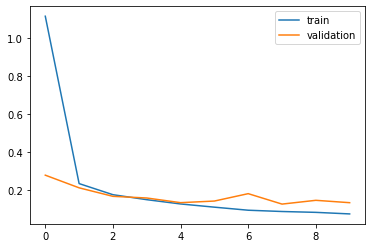

In [12]:
from keras.models import load_model

es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=1)
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

history_es_cp = model_es.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es,cp])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.

saved_model = load_model('best_model.h5')

_, train_acc = saved_model.evaluate(X_train,y_train,verbose=0)
_, validation_acc = saved_model.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('\n')
#plot to see training & test loss
plt.plot(history_es_cp.history['loss'],label='train')
plt.plot(history_es_cp.history['val_loss'],label='validation')
plt.legend()
plt.show()

* From the above model the Train & Validation accuracy are 97.9% & 96.9% respectively with their loss at 7% & 13.5% approximately.

* Will try further by introducing Dropouts to see if accuracy increases and loss decreases further.

### Model with 3 Hidden Layers, EarlyStopping & Checkpoint callbacks along with a Dropout @25% on every Hidden Layer

In [13]:
model_es_cp_do = Sequential()

model_es_cp_do.add(layers.Flatten(input_shape=(28,28)))
model_es_cp_do.add(Dense(100,activation='relu')), Dropout(0.25)
model_es_cp_do.add(Dense(80,activation='relu')), Dropout(0.25)
model_es_cp_do.add(Dense(60,activation='relu')), Dropout(0.25)
model_es_cp_do.add(Dense(10,activation='softmax')), Dropout(0.25)

model_es_cp_do.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_es_cp_do.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_6 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                610       
Total params: 92,050
Trainable params: 92,050
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.9775 - acc: 0.7862 - val_loss: 0.3064 - val_acc: 0.9232

Epoch 00001: val_acc improved from -inf to 0.92320, saving model to best_model.h5
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2218 - acc: 0.9372 - val_loss: 0.2185 - val_acc: 0.9420

Epoch 00002: val_acc improved from 0.92320 to 0.94200, saving model to best_model.h5
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1842 - acc: 0.9469 - val_loss: 0.2069 - val_acc: 0.9436

Epoch 00003: val_acc improved from 0.94200 to 0.94360, saving model to best_model.h5
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1465 - acc: 0.9573 - val_loss: 0.1657 - val_acc: 0.9570

Epoch 00004: val_acc improved from 0.94360 to 0.95700, saving model to best_model.h5
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1275 - acc: 0.9634 - val_loss: 0.1648 - val_a

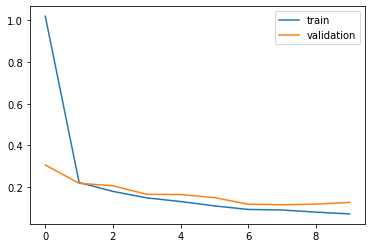

In [14]:
from keras.models import load_model

es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=1)
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

history_es_cp_do = model_es_cp_do.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es,cp])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.

saved_model = load_model('best_model.h5')

_, train_acc = saved_model.evaluate(X_train,y_train,verbose=0)
_, validation_acc = saved_model.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('\n')
#plot to see training & test loss
plt.plot(history_es_cp_do.history['loss'],label='train')
plt.plot(history_es_cp_do.history['val_loss'],label='validation')
plt.legend()
plt.show()

* Using 25% dropout and callbacks like ModelCheckPoint & EarlyStopping we can say that the validation loss has decreased and is now 0.1268 with an accuracy of 97%

* Hence considering the above model with 97% validation accuracy & 12.7% loss on Test dataset

In [15]:
predictions_es_cp_do = model_es_cp_do.predict(X_test) #predicting value using the Early Stopping model.

In [19]:
predictions_es_cp_do[0] # this gives the one hot encoding value of the target variable for the provided index.
print("Predicted Value for image @{} position in Test Data is: {}".format(0,np.argmax(predictions_es_cp_do[0]))) #this gives the value of prediction.
print("Actual value for image @{} position in Test Data is: {}".format(0,y_test[0])) #this gives the actual value

Predicted Value for image @0 position in Test Data is: 3
Actual value for image @0 position in Test Data is: 3


In [21]:
_, test_acc = saved_model.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy is: %3f' % (test_acc))

Test Accuracy is: 0.968800


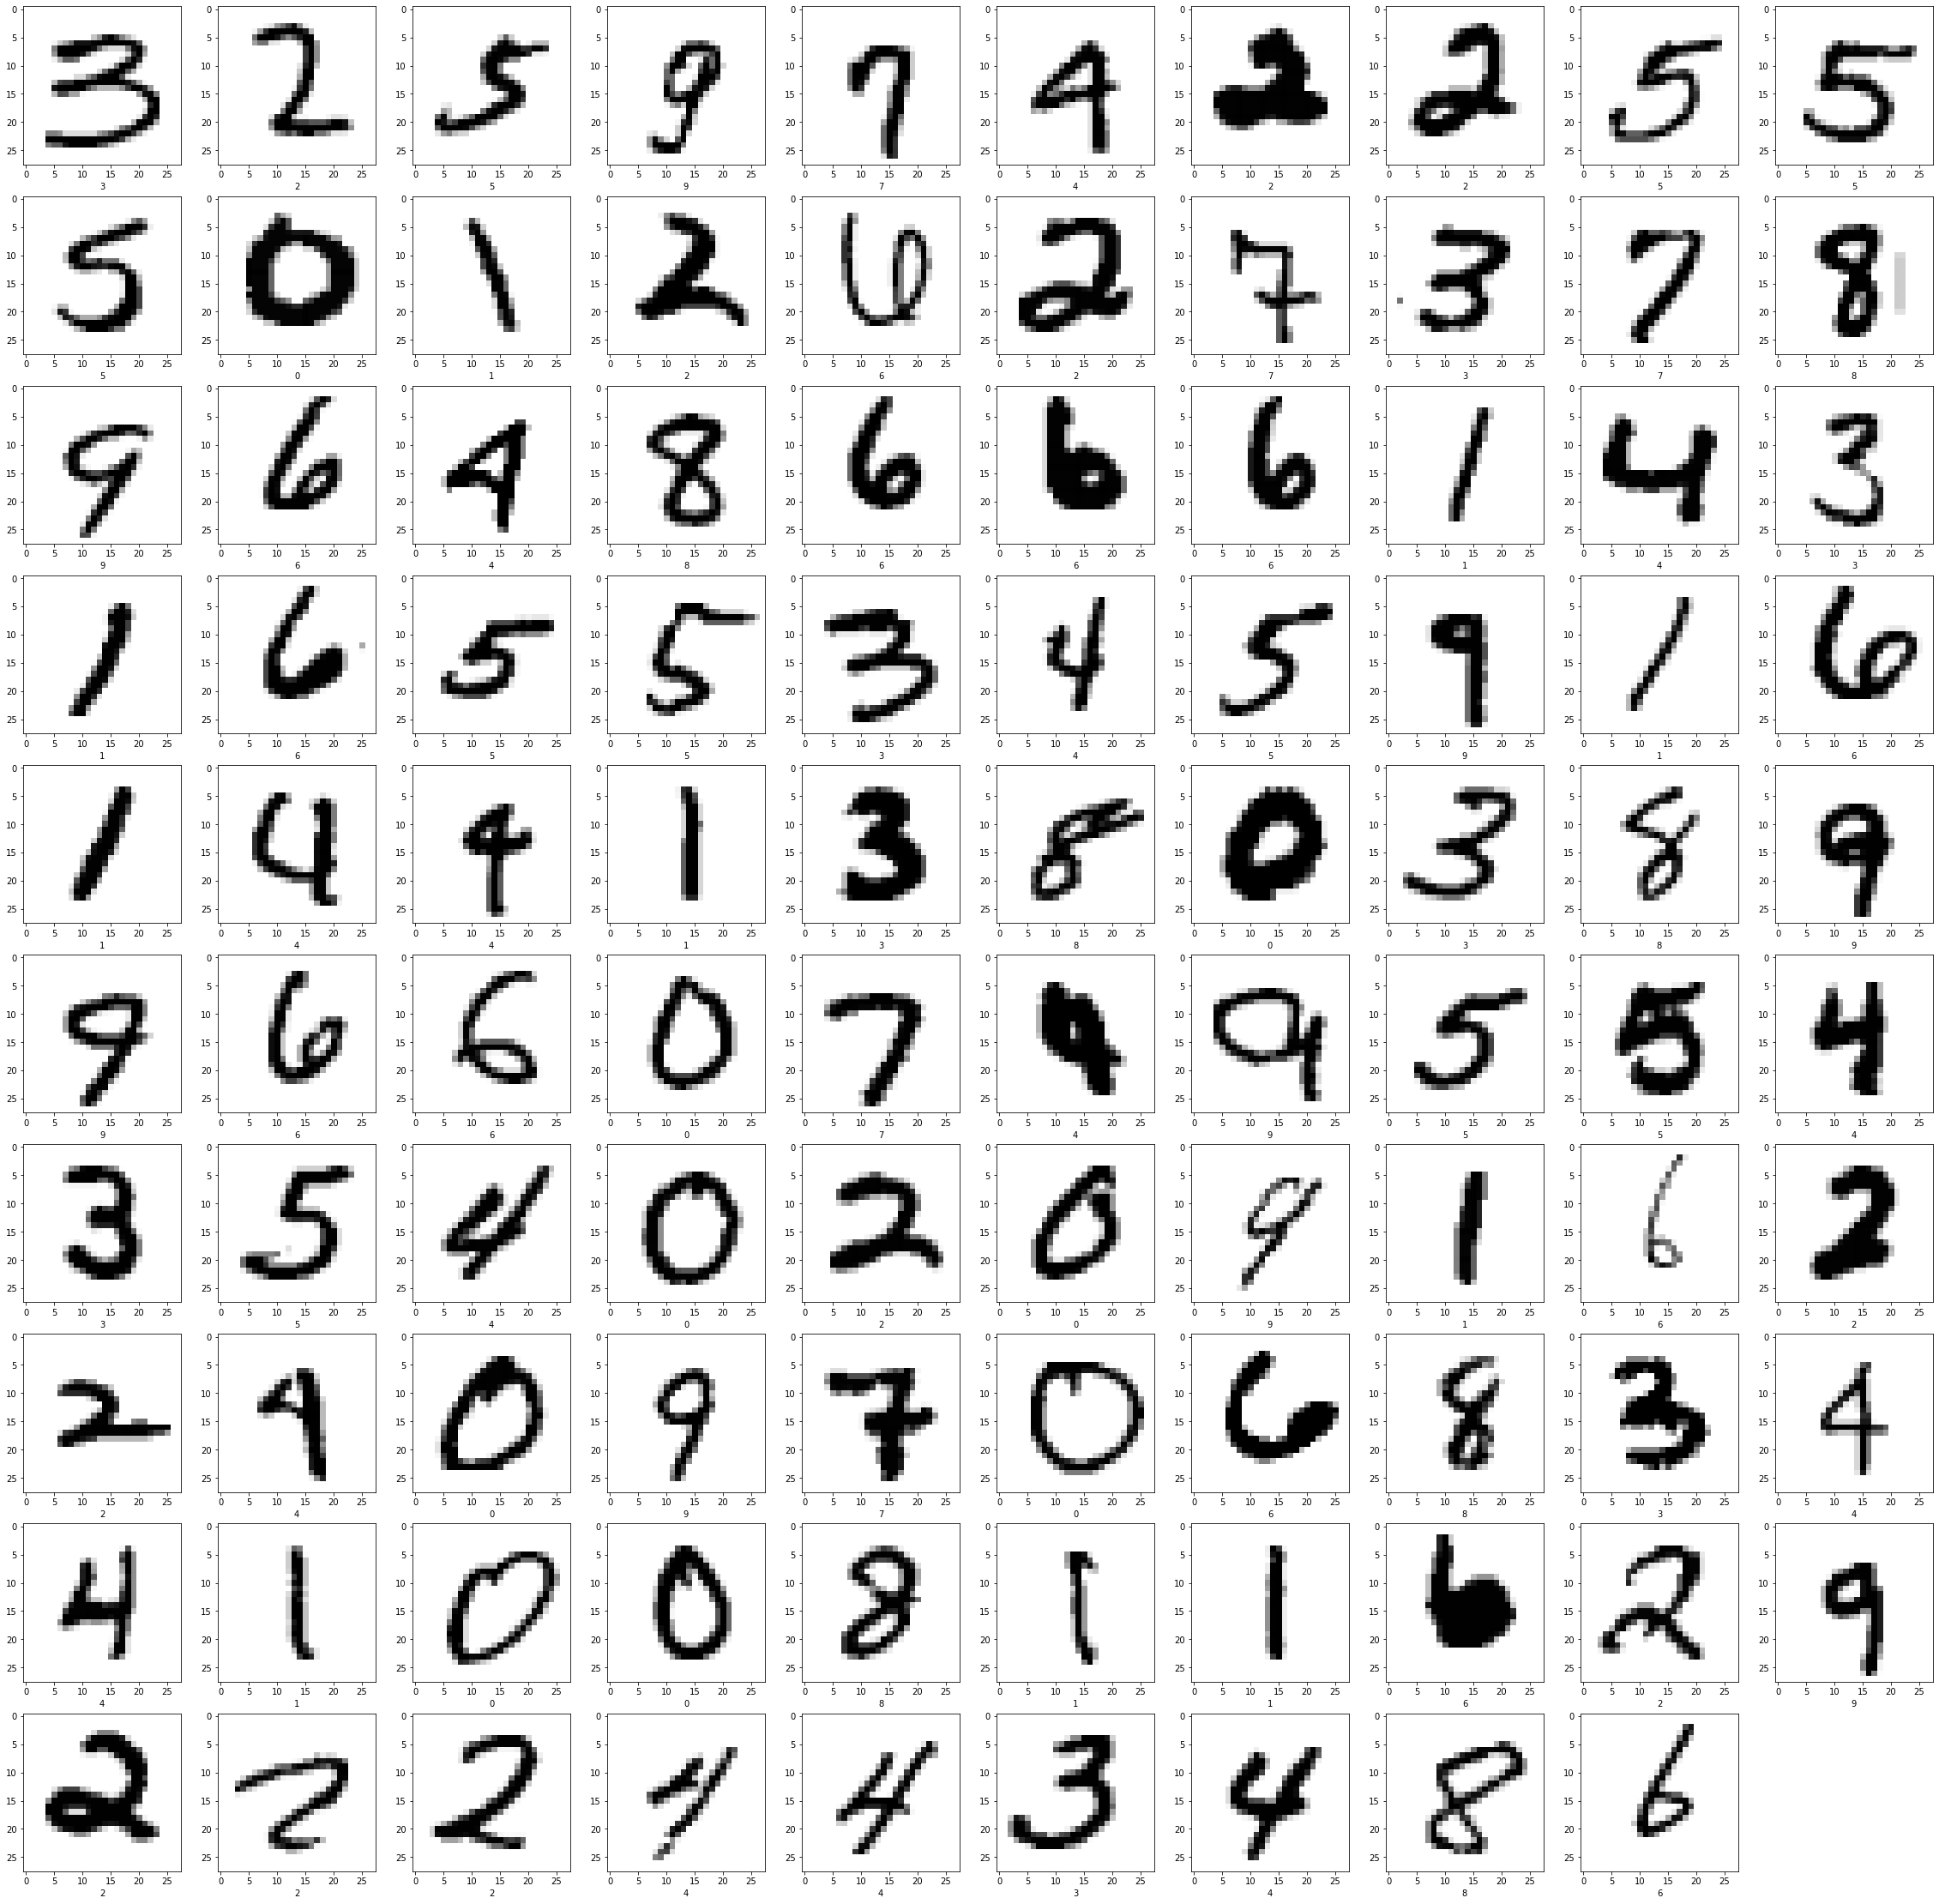

In [18]:
#printing first 3 images from the training dataset by calling the above created function. Here image is from our prediction & Label on x-axis is actual value.
plt.figure(figsize=(40,40))
for index in range(99):  
  plt.subplot(10,10,index+1)
  plt.imshow(X_test[index],cmap=plt.cm.binary)
  plt.xlabel(y_test[index])
plt.show()

### Conclusion

* This shows that the first 10 predicted values are absolutely correct and the overall Test accuracy is 97%.